## 3 - Estimação

In [1]:
from thinkbayes2 import Suite

### 3.1 - O problema dos dados

- Uma caixa que contém dados de 4, 6, 8, 12 e 20 lados;

- Suponha que eu selecione um dado da caixa aleatoriamente, role-o e receba um 6. Qual é a probabilidade de rolar cada dado?

- Estratégia de três etapas para abordar um problema como este.

    - Escolha uma representação para as hipóteses.
    - Escolha uma representação para os dados.
    - Escreva a função de probabilidade.

In [4]:
class Dice(Suite):
    
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo

In [8]:
suite = Dice([4, 6, 8, 12, 20])
suite.Update(6)
suite.Print()

4 0.0
6 0.3921568627450981
8 0.29411764705882354
12 0.19607843137254904
20 0.11764705882352944


- A probabilidade para o dado de 4 lados é 0, pois o dado de 4 lados não possui o valor 6.

In [9]:
for roll in [6, 8, 7, 7, 5, 4]:
    suite.Update(roll)
    suite.Print()

4 0.0
6 0.5256241787122208
8 0.2956636005256242
12 0.1314060446780552
20 0.047306176084099885
4 0.0
6 0.0
8 0.7351339577434111
12 0.2178174689610107
20 0.04704857329557832
4 0.0
6 0.0
8 0.817574005587765
12 0.16149609986918817
20 0.020929894543046793
4 0.0
6 0.0
8 0.8757125344951456
12 0.11532016915162413
20 0.008967296353230295
4 0.0
6 0.0
8 0.9158452719690099
12 0.08040342579700499
20 0.0037513022339850668
4 0.0
6 0.0
8 0.9432484536722124
12 0.0552061280612909
20 0.001545418266496554


- Com alguns lançamentos de dados a mais, o dado de 6 lados é eliminado e o dado maus provável é o de 8 lados;

### 3.2 - O problema da locomotiva

Uma ferrovia enumera suas locomotivas na ordem 1..N. Um dia você vê uma locomotiva com o número 60. Estime quantas locomotivas a ferrovia possui?

Para aplicar o raciocínio bayesiano, podemos dividir esse problema em duas etapas:

- O que sabíamos sobre N antes de vermos os dados? (**Priori**)
- Para qualquer valor dado de N , qual é a probabilidade de visualizar os dados (uma locomotiva com o número 60)?(**Verossimilhança**)

- Não possui muita informação para escolher uma priori;
- Suponha que N é igualmente provável para qualquer valor entre 1 e 1000;

In [3]:
hypos = range(1, 1001)

- Se assumirmos que existe apenas uma empresa operacional de trem;
- São igualmente provável de ver qualquer de suas locomotivas;

In [2]:
class Train(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo

- A função de verossimilhança da locomotiva é igual para os dados;

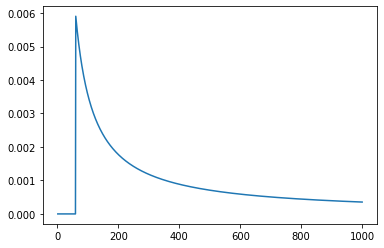

In [4]:
suite = Train(hypos)
suite.Update(60)
suite.plot()

- O valor mais provável para o problema da locomotiva é 60;
- Calcular a média da distribuição posteriori;

In [5]:
suite.mean()

333.41989326371095

- A média é um bom palpite para minimizar o erro quadrático médio a longo prazo.

### 3.3 - E quanto a priori

- Foram feitas algumas suposições para resolver o problema da locomotiva;

- Portanto, podemos nos perguntar se a distribuição posterior é sensível a essas suposições. Com tão poucos dados - apenas uma observação - provavelmente é;


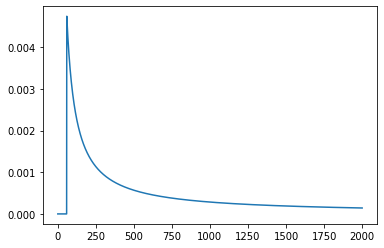

552.179017164631

In [6]:
hypos = range(1, 2001)
suite = Train(hypos)
suite.Update(60)
suite.plot()
suite.mean()

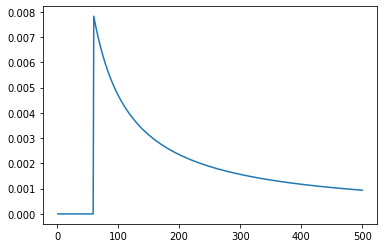

207.079227983409

In [7]:
hypos = range(1, 501)
suite = Train(hypos)
suite.Update(60)
suite.plot()
suite.mean()

Duas maneiras para proceder:
- Obter mais dados;
- Obter mais informações anterior(básicas)

Com mais dados, a distribuição posteriori baseada em diferentes priori tendem a convergir;


In [6]:
hypos = range(1, 1001)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
    print(suite.mean())

333.41989326371095
178.5473531797158
164.3055864227336


In [7]:
hypos = range(1, 501)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
    print(suite.mean())

207.079227983409
143.812319820979
151.84958795903822


In [8]:
hypos = range(1, 2001)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
    print(suite.mean())

552.179017164631
215.56892550615473
171.3381810915094


### 3.4 - Uma priori alternativa

- Se mais dados não estiverem disponíveis, outra opção é melhorar os anteriores, reunindo mais informações básicas.

    - Poderíamos encontrar uma lista de empresas que operam locomotivas na área de observação;
    - Podemos entrevistar um **especialista** em transporte ferroviário para coletar informações sobre o tamanho típico das empresas.

Na maioria dos campos, existem muitas empresas pequenas, menos empresas de médio porte e apenas uma ou duas empresas muito grandes.

\begin{equation}
PMF \propto \left (\frac{1}{x}\right )^{\alpha}
\end{equation}

- Lei do poder(energia);

In [12]:
from thinkbayes import Pmf
import matplotlib.pyplot as plt

class Train(Pmf):
    
    def __init__(self, hypos, alpha=1):
        super().__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()
    
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
        
    def Print(self):
        for hypo, prob in self.Items():
            print(hypo, prob)
    
    def plot(self):
        x = []
        y = []
        for hypo, prob in self.Items():
            x.append(hypo)
            y.append(prob)
        plt.plot(x, y)
        plt.show()
    
    def mean(self):
        total = 0
        for hypo, prob in self.Items():
            total += hypo * prob
        
        return total
    
    def Percentile(self, percentage):
        p = percentage/100
        total = 0
        for val, prob in self.Items():
            total += prob
            if total >= p:
                return val

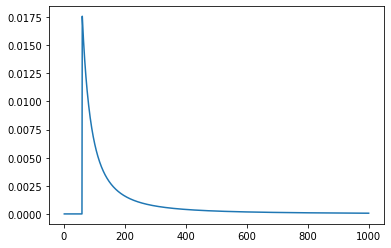

178.54735317971574

In [13]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(60)
suite.plot()
suite.mean()

In [14]:
hypos = range(1, 501)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
    print(suite.mean())

143.81231982097896
106.36102951451466
130.70846986256004


In [15]:
hypos = range(1, 1001)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
    print(suite.mean())

178.54735317971574
112.32543159449712
133.2752313750312


In [16]:
hypos = range(1, 2001)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
    print(suite.mean())

215.56892550615513
115.5682277235634
133.99746308073065


### 3.5 - Intervalos de credibilidade

É útil resumir os resultados com uma estimativa de ponto único ou um intervalo.

Para ponto único:
- Média;
- Mediana;
- Máxima verossimilhança;

Para intervalo(**intervalo de credibilidade**):
- Dois valores calculados para que haja 90% de chance de o valor desconhecido cair entre eles;


In [17]:
interval = suite.Percentile(5), suite.Percentile(95)
print(interval)

(91, 243)


### 3.6 - Funções de distribuição cumulativa (CDF)

Para calcular os valores de percentis é mais eficiente usar uma função de distribuição cumulativa, ou Cdf;

In [18]:
cdf = suite.MakeCdf()

In [19]:
interval = cdf.Percentile(5), cdf.Percentile(95)
print(interval)

(91, 243)


### 3.7 - O problema do tanque alemão

- Análise estatística para estimar a produção alemã de tanques e outros equipamentos;


### 3.8 - Discussão

- **Priori informativa**: 
    - Represente informações básicas sobre o problema;
    - As priores informativos geralmente parecem subjetivos;


- **Priori não informativa**:
    - Permitir que os dados falem por si mesmos;
    - São mais objetivas;


Análise bayesiana é sempre baseada em decisões de modelagem -> toda a análise ainda é subjetiva.

- Possui muitos dados ou pouco.
    - Muito dados: a escolha do prior não importa muito; 
    - Pouco dados: Priori informativa faz grande diferença;
